In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os
import zipfile
import glob
%matplotlib inline



In [0]:
#sparkdf = spark.sql("select *  from dbfs:/FileStore/shared_uploads/sohaib.el-mouhtadi@etu.univ-amu.fr/202109-baywheels-tripdata.csv/202109_baywheels_tripdata-2.csv")
df = spark.read.option("header","true").format("csv").load("dbfs:/FileStore/shared_uploads/sohaib.el-mouhtadi@etu.univ-amu.fr/201912-baywheels-tripdata.csv/201912_baywheels_tripdata.csv")
df_baywheels = df.toPandas()

In [0]:
# Visualize info from dataset
df_baywheels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150102 entries, 0 to 150101
Data columns (total 14 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 duration_sec 150102 non-null object
 1 start_time 150102 non-null object
 2 end_time 150102 non-null object
 3 start_station_id 129083 non-null object
 4 start_station_name 129087 non-null object
 5 start_station_latitude 150102 non-null object
 6 start_station_longitude 150102 non-null object
 7 end_station_id 128755 non-null object
 8 end_station_name 128757 non-null object
 9 end_station_latitude 150102 non-null object
 10 end_station_longitude 150102 non-null object
 11 bike_id 150102 non-null object
 12 user_type 150102 non-null object
 13 rental_access_method 27681 non-null object
dtypes: object(14)
memory usage: 16.0+ MB

In [0]:
# Visualize the first five rows
df_baywheels.head()

Out[25]:

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,66600,2019-12-31 14:28:50.2860,2020-01-01 08:58:51.2500,364,China Basin St at 3rd St,37.7719996,-122.3899698,349,Howard St at Mary St,37.7810097172,-122.4056661129,12085,Customer,None
1,36526,2019-12-31 21:52:47.7620,2020-01-01 08:01:33.9320,38,The Embarcadero at Pier 38,37.782926087,-122.3879206181,410,Illinois St at Cesar Chavez St,37.7502000103,-122.3865674436,9477,Customer,None
2,8164,2019-12-31 23:50:04.8770,2020-01-01 02:06:09.4140,14,Clay St at Battery St,37.795001,-122.39997,6,The Embarcadero at Sansome St,37.80477,-122.403234,10420,Customer,None
3,8163,2019-12-31 23:49:21.4000,2020-01-01 02:05:24.6670,14,Clay St at Battery St,37.795001,-122.39997,6,The Embarcadero at Sansome St,37.80477,-122.403234,2065,Customer,None
4,6847,2019-12-31 22:51:05.6850,2020-01-01 00:45:13.4860,3,Powell St BART Station (Market St at 4th St),37.7863752686,-122.4049043655,363,Salesforce Transit Center (Natoma St at 2nd St),37.7874921044,-122.3982846737,10219,Customer,None


In [0]:
# Verify statistics values
df_baywheels.describe().T

Out[26]:

,count,unique,top,freq
duration_sec,150102,4606,380,226
start_time,150102,149784,2019-12-27 12:56:34,3
end_time,150102,149798,2019-12-30 15:12:40,3
start_station_id,129083,421,30,3134
start_station_name,129087,422,San Francisco Caltrain (Townsend St at 4th St),3134
start_station_latitude,150102,20749,37.776598,3134
start_station_longitude,150102,20985,-122.395282,3134
end_station_id,128755,423,30,4846
end_station_name,128757,425,San Francisco Caltrain (Townsend St at 4th St),4846
end_station_latitude,150102,21101,37.776598,4846


In [0]:
# Verify values nulls
df_baywheels.isnull().sum()

Out[28]: duration_sec 0
start_time 0
end_time 0
start_station_id 21019
start_station_name 21015
start_station_latitude 0
start_station_longitude 0
end_station_id 21347
end_station_name 21345
end_station_latitude 0
end_station_longitude 0
bike_id 0
user_type 0
rental_access_method 122421
dtype: int64

In [0]:
# Verify values nulls in percent
(df_baywheels.isnull().sum() / df_baywheels.shape[0]) * 100

Out[29]: duration_sec 0.000000
start_time 0.000000
end_time 0.000000
start_station_id 14.003145
start_station_name 14.000480
start_station_latitude 0.000000
start_station_longitude 0.000000
end_station_id 14.221663
end_station_name 14.220330
end_station_latitude 0.000000
end_station_longitude 0.000000
bike_id 0.000000
user_type 0.000000
rental_access_method 81.558540
dtype: float64

In [0]:
# Verify values in column
df_baywheels['start_station_id'].value_counts()

Out[30]: 30 3134
58 2452
81 2347
22 1884
16 1686
 ... 
437 7
228 6
444 3
224 2
421 1
Name: start_station_id, Length: 421, dtype: int64

In [0]:
# Verify values in column
df_baywheels['start_station_name'].value_counts()

Out[31]: San Francisco Caltrain (Townsend St at 4th St) 3134
Market St at 10th St 2452
Berry St at 4th St 2347
Howard St at Beale St 1884
Steuart St at Market St 1686
 ... 
Foothill Blvd at Harrington Ave 6
Jackson St at N 1st St 4
Mercado Way at Sierra Rd 3
21st Ave at International Blvd 2
23rd St at Taylor St 1
Name: start_station_name, Length: 422, dtype: int64

In [0]:
# Verify values in column
df_baywheels['end_station_id'].value_counts()

Out[32]: 30 4846
21 2744
81 2438
58 2361
3 2262
 ... 
444 4
298 4
224 4
421 1
420 1
Name: end_station_id, Length: 423, dtype: int64

In [0]:
# Verify values in column
df_baywheels['end_station_name'].value_counts()


Out[33]: San Francisco Caltrain (Townsend St at 4th St) 4846
Montgomery St BART Station (Market St at 2nd St) 2744
Berry St at 4th St 2438
Market St at 10th St 2361
Powell St BART Station (Market St at 4th St) 2262
 ... 
21st Ave at International Blvd 4
23rd St at Taylor St 1
N 3rd St at E Taylor St 1
Jackson St at N 1st St 1
SF Test Station 1
Name: end_station_name, Length: 425, dtype: int64

In [0]:
# Verify values in column
df_baywheels['user_type'].value_counts()

Out[34]: Subscriber 78233
Customer 71869
Name: user_type, dtype: int64

In [0]:
# Verify values in column
df_baywheels['bike_id'].value_counts()

Out[35]: 483611 107
615745 105
259346 91
282535 90
679782 89
 ... 
2785 1
925063 1
486140 1
168341 1
2648 1
Name: bike_id, Length: 5905, dtype: int64

In [0]:
# Verify values in column
df_baywheels['rental_access_method'].value_counts()

Out[36]: app 23994
clipper 3687
Name: rental_access_method, dtype: int64

In [0]:
df_baywheels['duration_sec'].describe(percentiles=[.98])

Out[37]: count 150102
unique 4606
top 380
freq 226
Name: duration_sec, dtype: object

In [0]:
# Create copy of dataset
df_baywheels_clean = df_baywheels.copy()

In [0]:
# Drop columns 'start_station_id', 'end_station_id',"start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude" and "bike_id"
df_baywheels_clean = df_baywheels_clean.drop([ 'start_station_id', 'end_station_id','start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_id'], axis=1)

In [0]:

# Drop column "rental_access_method"
df_baywheels_clean = df_baywheels_clean.drop(['rental_access_method'], axis=1)

In [0]:
# Drop rows in start_station_name and end_station_name
df_baywheels_clean = df_baywheels_clean[~((df_baywheels_clean['start_station_name'].isnull()) | df_baywheels_clean['end_station_name'].isnull())]

In [0]:
# Verify nulls values
df_baywheels_clean.isnull().sum()

Out[42]: duration_sec 0
start_time 0
end_time 0
start_station_name 0
end_station_name 0
user_type 0
dtype: int64

In [0]:
# Verify info
df_baywheels_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125638 entries, 0 to 149779
Data columns (total 6 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 duration_sec 125638 non-null object
 1 start_time 125638 non-null object
 2 end_time 125638 non-null object
 3 start_station_name 125638 non-null object
 4 end_station_name 125638 non-null object
 5 user_type 125638 non-null object
dtypes: object(6)
memory usage: 6.7+ MB

In [0]:
# Set datatype in start_time and end_time to datetime 
df_baywheels_clean['start_time'] = pd.to_datetime(df_baywheels_clean['start_time'])
df_baywheels_clean['end_time'] = pd.to_datetime(df_baywheels_clean['end_time'])

In [0]:
# Set "user_type" as category type
df_baywheels_clean['user_type'] = df_baywheels_clean['user_type'].astype('category')

In [0]:

# Verify info
df_baywheels_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125638 entries, 0 to 149779
Data columns (total 6 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 duration_sec 125638 non-null object 
 1 start_time 125638 non-null datetime64[ns]
 2 end_time 125638 non-null datetime64[ns]
 3 start_station_name 125638 non-null object 
 4 end_station_name 125638 non-null object 
 5 user_type 125638 non-null category 
dtypes: category(1), datetime64[ns](2), object(3)
memory usage: 5.9+ MB

In [0]:
#set duration_sec as integer type
df_baywheels_clean['duration_sec']=df_baywheels_clean['duration_sec'].astype('float64')

In [0]:
# Create columns "start_time_hour", "end_time_hour", "time_day_of_week", "duration_minute" and "time_week_type"
df_baywheels_clean['start_time_hour'] = df_baywheels_clean['start_time'].dt.hour # Get hour
df_baywheels_clean['end_time_hour'] = df_baywheels_clean['end_time'].dt.hour # Get hour
df_baywheels_clean['time_day_of_week'] = df_baywheels_clean['start_time'].dt.day_name() # Get day of week name
df_baywheels_clean['duration_minute'] = df_baywheels_clean['duration_sec'].apply(lambda x: round(x / 60, 2)) # Transform second to minute

In [0]:
# Set "time_week_type" as category type and ordered
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_classes = pd.api.types.CategoricalDtype(ordered = True, categories = day_of_week)
df_baywheels_clean['time_day_of_week'] = df_baywheels_clean['time_day_of_week'].astype(day_of_week_classes)

In [0]:
# Verify info
df_baywheels_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125638 entries, 0 to 149779
Data columns (total 10 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 duration_sec 125638 non-null float64 
 1 start_time 125638 non-null datetime64[ns]
 2 end_time 125638 non-null datetime64[ns]
 3 start_station_name 125638 non-null object 
 4 end_station_name 125638 non-null object 
 5 user_type 125638 non-null category 
 6 start_time_hour 125638 non-null int64 
 7 end_time_hour 125638 non-null int64 
 8 time_day_of_week 125638 non-null category 
 9 duration_minute 125638 non-null float64 
dtypes: category(2), datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 8.9+ MB

In [0]:

# Verify values in column
df_baywheels_clean['start_time_hour'].value_counts()

Out[52]: 8 15475
17 13969
9 12335
16 10141
18 9999
7 7185
15 6483
10 6155
19 6028
12 5620
11 5564
13 5454
14 5389
20 3871
21 2788
6 2698
22 2293
23 1395
0 835
5 762
1 524
2 323
4 216
3 136
Name: start_time_hour, dtype: int64

In [0]:
# Verify values in column
df_baywheels_clean['end_time_hour'].value_counts()

Out[53]: 8 14083
9 13837
17 13734
18 10932
16 9599
19 6725
10 6701
7 6085
15 6014
12 5608
11 5430
14 5428
13 5398
20 4112
21 2972
22 2441
6 2196
23 1495
0 921
5 625
1 557
2 394
4 209
3 142
Name: end_time_hour, dtype: int64

In [0]:
# Verify values in column
df_baywheels_clean['time_day_of_week'].value_counts()

Out[54]: Monday 24625
Tuesday 23879
Thursday 21426
Friday 19876
Wednesday 16546
Sunday 9704
Saturday 9582
Name: time_day_of_week, dtype: int64

In [0]:
# Verify values in column
df_baywheels_clean['duration_minute'].value_counts()

Out[56]: 6.32 189
5.27 189
6.07 185
6.53 184
6.33 184
 ... 
44.92 1
76.93 1
141.82 1
49.02 1
68.90 1
Name: duration_minute, Length: 4198, dtype: int64

In [0]:
# Sorted dateset by column "start_time"
df_baywheels_clean = df_baywheels_clean.sort_values(by=['start_time']).reset_index(drop=True)

In [0]:
# Verify dataset
df_baywheels_clean

Out[58]:

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,start_time_hour,end_time_hour,time_day_of_week,duration_minute
0,209.0,2019-12-01 00:00:25.336,2019-12-01 00:03:54.836,Fruitvale BART Station,Fruitvale Ave at International Blvd,Customer,0,0,Sunday,3.48
1,682.0,2019-12-01 00:03:46.689,2019-12-01 00:15:09.352,22nd St Caltrain Station,17th St at Valencia St,Customer,0,0,Sunday,11.37
2,720.0,2019-12-01 00:07:44.840,2019-12-01 00:19:45.008,Valencia St at 21st St,Randall St at Chenery St,Customer,0,0,Sunday,12.00
3,305.0,2019-12-01 00:09:48.562,2019-12-01 00:14:53.578,South San Jose State (7th St at Humboldt St),5th St at Virginia St,Subscriber,0,0,Sunday,5.08
4,831.0,2019-12-01 00:13:39.222,2019-12-01 00:27:31.170,Webster St at 19th St,Jack London Square,Subscriber,0,0,Sunday,13.85
...,...,...,...,...,...,...,...,...,...,...
125633,1275.0,2019-12-31 23:56:05.939,2020-01-01 00:17:21.935,Cruise Terminal at Pier 27,Embarcadero BART Station (Beale St at Market St),Customer,23,0,Tuesday,21.25
125634,782.0,2019-12-31 23:56:34.462,2020-01-01 00:09:36.705,The Embarcadero at Steuart St,The Embarcadero at Steuart St,Customer,23,0,Tuesday,13.03
125635,781.0,2019-12-31 23:56:40.324,2020-01-01 00:09:41.545,The Embarcadero at Steuart St,The Embarcadero at Steuart St,Customer,23,0,Tuesday,13.02
125636,185.0,2019-12-31 23:57:01.551,2020-01-01 00:00:07.494,San Francisco Public Library (Grove St at Hyde...,Market St at Franklin St,Customer,23,0,Tuesday,3.08


In [0]:
# Verify Info
df_baywheels_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125638 entries, 0 to 125637
Data columns (total 10 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 duration_sec 125638 non-null float64 
 1 start_time 125638 non-null datetime64[ns]
 2 end_time 125638 non-null datetime64[ns]
 3 start_station_name 125638 non-null object 
 4 end_station_name 125638 non-null object 
 5 user_type 125638 non-null category 
 6 start_time_hour 125638 non-null int64 
 7 end_time_hour 125638 non-null int64 
 8 time_day_of_week 125638 non-null category 
 9 duration_minute 125638 non-null float64 
dtypes: category(2), datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 7.9+ MB

In [0]:
# Copy de final dataset
df_baywheels_final = df_baywheels_clean.copy()

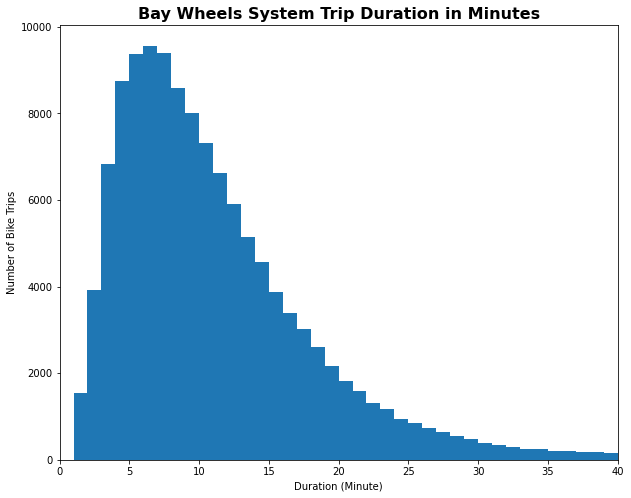

In [0]:
# Duration of the bike rides in minutes
plt.figure(figsize=(10, 8))
binsize = 1
bins = np.arange(0, df_baywheels_final['duration_minute'].max() + binsize, binsize)

plt.hist(data = df_baywheels_final, x = 'duration_minute', bins = bins);

plt.title("Bay Wheels System Trip Duration in Minutes", fontsize=16, fontweight='bold')
plt.xlabel('Duration (Minute)')
plt.ylabel('Number of Bike Trips')
plt.xlim([0,40]);

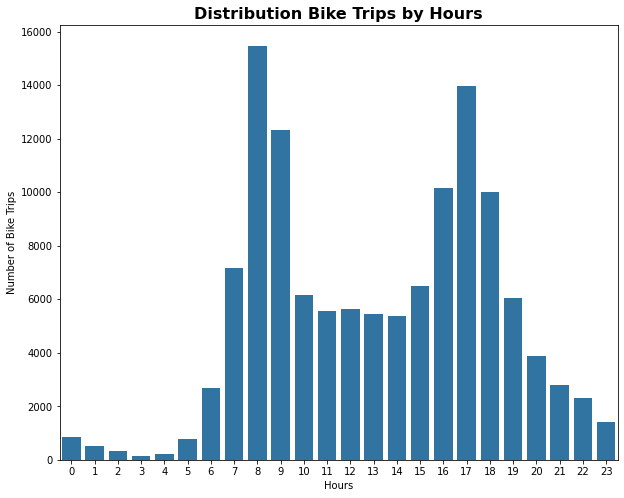

In [0]:
# Get palette color
base_color = sb.color_palette()[0]

# Plot distribution by "start_time_hour"
plt.figure(figsize=(10, 8))
sb.countplot(data = df_baywheels_final, x = 'start_time_hour', color = base_color);
plt.title("Distribution Bike Trips by Hours", fontsize=16, fontweight='bold')
plt.xlabel('Hours')
plt.ylabel('Number of Bike Trips');

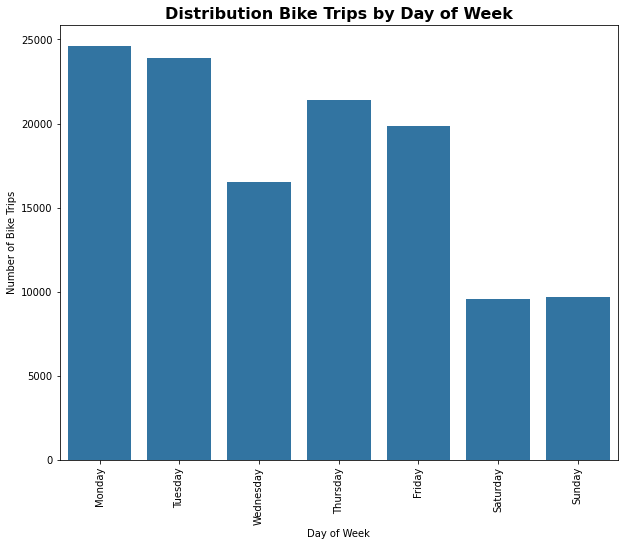

In [0]:
# Plot distribution by "time_day_of_week"
plt.figure(figsize=(10, 8))
sb.countplot(data = df_baywheels_final, x = 'time_day_of_week', color = base_color);
plt.xticks(rotation=90)
plt.title("Distribution Bike Trips by Day of Week", fontsize=16, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bike Trips');

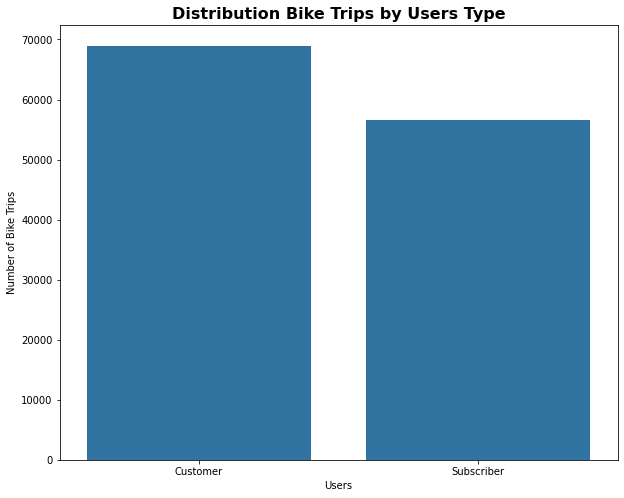

In [0]:
# Plot distribution by "user_type"
plt.figure(figsize=(10, 8))
sb.countplot(data = df_baywheels_final, x = 'user_type', color = base_color);
plt.title("Distribution Bike Trips by Users Type", fontsize=16, fontweight='bold')
plt.xlabel('Users')
plt.ylabel('Number of Bike Trips');

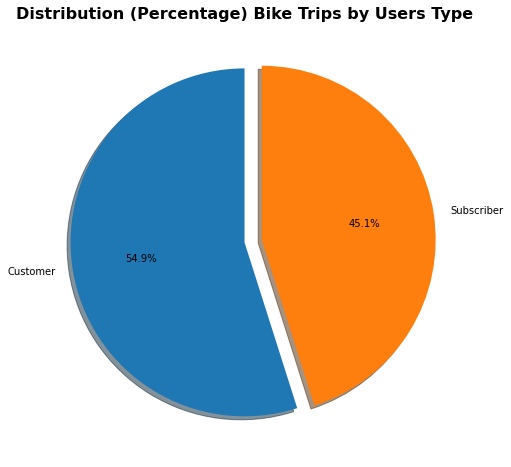

In [0]:
# Pie plot distribution by "user_type"
plt.figure(figsize=(10, 8))
plt.title("Distribution (Percentage) Bike Trips by Users Type", fontsize=16, fontweight='bold')
labels = ['Customer', 'Subscriber']
data = [(df_baywheels_final['user_type'].value_counts(normalize=True) * 100)['Customer'], (df_baywheels_final['user_type'].value_counts(normalize=True) * 100)['Subscriber']]

plt.pie(data, explode=(0, 0.1), labels = labels, autopct='%1.1f%%', shadow=True, startangle=90);

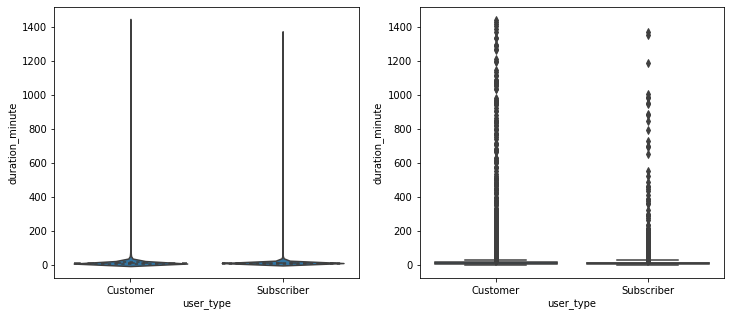

In [0]:
# Bivariate plots of "duration_minute" vs. "user_type"
plt.figure(figsize = [12, 5])

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_baywheels_final, x = 'user_type', y = 'duration_minute', color = base_color, inner='quartile')

plt.subplot(1, 2, 2)
sb.boxplot(data = df_baywheels_final, x = 'user_type', y = 'duration_minute', color = base_color)

plt.ylim(ax1.get_ylim());

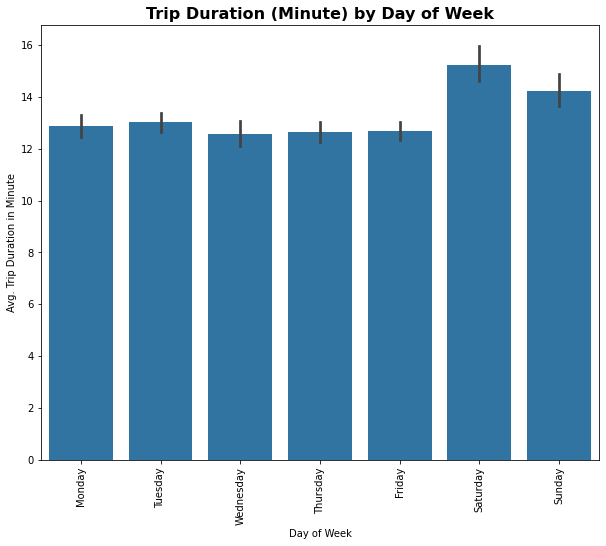

In [0]:

# Bivariate plots of "time_day_of_week" vs "duration_minute"
plt.figure(figsize=(10, 8))
sb.barplot(data=df_baywheels_final, x='time_day_of_week', y='duration_minute', color=base_color);
plt.xticks(rotation=90)
plt.title("Trip Duration (Minute) by Day of Week", fontsize=16, fontweight='bold')
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

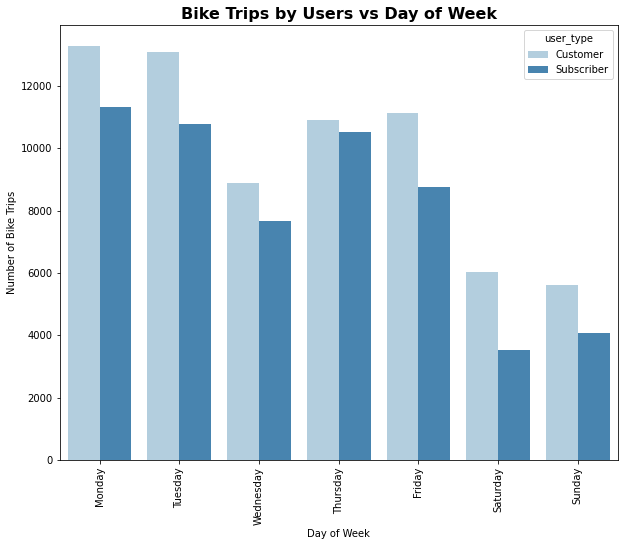

In [0]:
# Bivariate plots of "time_day_of_week" vs "user_type"
plt.figure(figsize=(10, 8))
sb.countplot(data = df_baywheels_final, x = 'time_day_of_week', hue = 'user_type', palette = 'Blues')
plt.xticks(rotation=90)
plt.title("Bike Trips by Users vs Day of Week", fontsize=16, fontweight='bold')
plt.xlabel('Day of Week');
plt.ylabel('Number of Bike Trips');

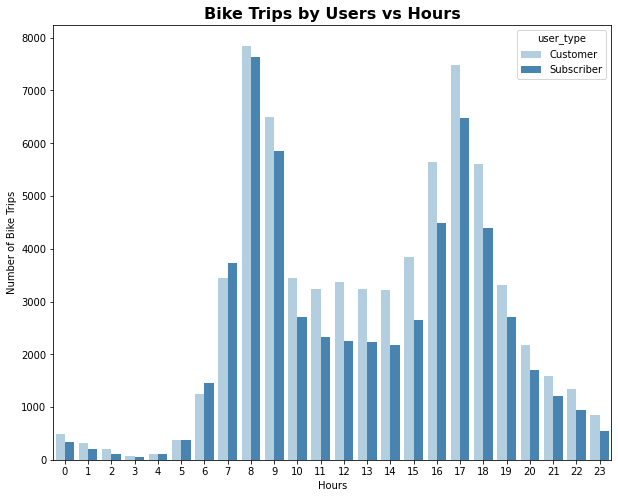

In [0]:
# Bivariate plots of "time_day_of_week" vs "user_type"
plt.figure(figsize=(10, 8))
sb.countplot(data = df_baywheels_final, x = 'start_time_hour', hue = 'user_type', palette = 'Blues')
plt.title("Bike Trips by Users vs Hours", fontsize=16, fontweight='bold')
plt.xlabel('Hours');
plt.ylabel('Number of Bike Trips');

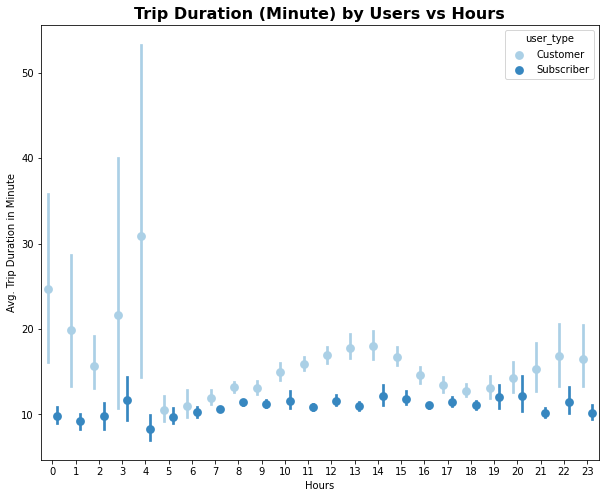

In [0]:
# Multivariate plots of Avg. Duration (minute) by "start_time_hour" vs "user_type"
fig = plt.figure(figsize=(10, 8))
ax = sb.pointplot(data = df_baywheels_final, x = 'start_time_hour', y = 'duration_minute', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration (Minute) by Users vs Hours', fontsize=16, fontweight='bold')
plt.ylabel('Avg. Trip Duration in Minute')
plt.xlabel('Hours');
ax.set_yticklabels([],minor = True)
plt.show();

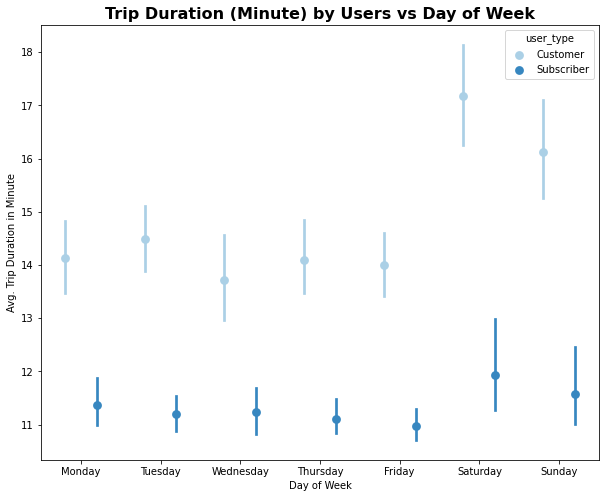

In [0]:
# Multivariate plots of Avg. Duration (minute) by "time_day_of_week" vs "user_type"
fig = plt.figure(figsize=(10, 8))
ax = sb.pointplot(data = df_baywheels_final, x = 'time_day_of_week', y = 'duration_minute', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration (Minute) by Users vs Day of Week', fontsize=16, fontweight='bold')
plt.ylabel('Avg. Trip Duration in Minute')
plt.xlabel('Day of Week');
ax.set_yticklabels([],minor = True)
plt.show();